### Imports


In [ ]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline 
import datetime
from livelossplot import PlotLossesKeras
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%cd C:\Users\ultim\Documents\Leaf-Disease-Classifier-master

C:\Users\ultim\Documents\Leaf-Disease-Classifier-master


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs

In [ ]:
train_datagen = ImageDataGenerator(
      rotation_range = 270,
      brightness_range = (-2,2),
          shear_range=0.2,
          zoom_range=0.3,
      vertical_flip=True,
      validation_split=0.3,
          horizontal_flip=True)
test_datagen = ImageDataGenerator(vertical_flip=True,
                                  horizontal_flip=True,
                                  rotation_range=180,
                                  zoom_range=0.2)
val_datagen = ImageDataGenerator(vertical_flip=True,
                                  horizontal_flip=True,
                                  rotation_range=180,
                                  zoom_range=0.2)

## 8 Models trained Seperately

### Peach model

#### Model

In [ ]:
NUM_CLASSES = 2

#DATA:
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/Peach/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/Peach/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is

model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Peach.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Peach.h5')

else:
  history = model.fit(
          train_set,
          epochs=16,
          validation_data=test_set,
          validation_steps=400,
          verbose=1 )
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('Peach model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('Peach model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()
  model.save("Best_model\Peach.h5")
  model.save_weights("Best_weights\Peach.h5")

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Model loaded


In [ ]:
# model.save("Best_model\Peach.h5")

#### Prediction of peach

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.60
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\Peach\test\peach_bacterial_spot\peach_BS13.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ["Peach with bacterial", "Healthy Peach"]

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))


9/9 [==============================] - 9s 767ms/step - loss: 0.0154 - accuracy: 0.9981
accuracy: 99.81%
Peach with bacterial
probability : 0.9999989


### Apple Model


#### Model

Found 2537 images belonging to 4 classes.
Found 634 images belonging to 4 classes.
Epoch 1/24
40/40 [==============================] - 49s 1s/step - loss: 0.9992 - accuracy: 0.6145 - val_loss: 1.1571 - val_accuracy: 0.5189
Epoch 2/24
40/40 [==============================] - 27s 664ms/step - loss: 0.8186 - accuracy: 0.6957
Epoch 3/24
40/40 [==============================] - 28s 705ms/step - loss: 0.7975 - accuracy: 0.7020
Epoch 4/24
40/40 [==============================] - 27s 677ms/step - loss: 0.7965 - accuracy: 0.6981
Epoch 5/24
40/40 [==============================] - 27s 663ms/step - loss: 0.7920 - accuracy: 0.7044
Epoch 6/24
40/40 [==============================] - 27s 666ms/step - loss: 0.7697 - accuracy: 0.7107
Epoch 7/24
40/40 [==============================] - 27s 665ms/step - loss: 0.7827 - accuracy: 0.6949
Epoch 8/24
40/40 [==============================] - 28s 697ms/step - loss: 0.7568 - accuracy: 0.7150
Epoch 9/24
40/40 [==============================] - 28s 694ms/step - l

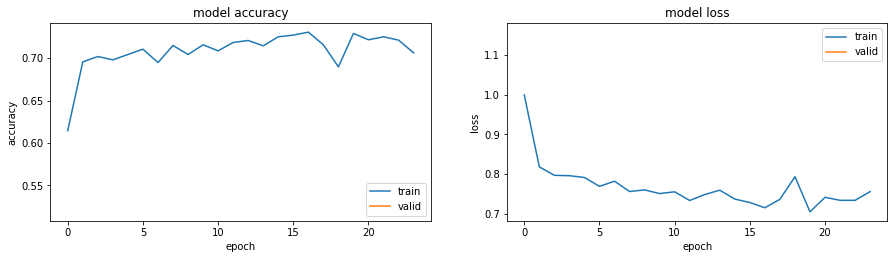

In [ ]:
NUM_CLASSES = 4

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/Apple/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/Apple/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')


RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))


# 2nd layer as Dense for 8-class classification
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)


if os.path.exists("Best_weights\Apple.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Apple.h5')

else:
  history = model.fit(
          train_set,
          epochs=24,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()
  
  model.save("Best_model\Apple.h5")
  model.save_weights("Best_weights\Apple.h5")

In [ ]:
# model.save("Best_model\Apple.h5")


#### Prediction of apple

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 6s 558ms/step - loss: 0.1363 - accuracy: 0.9653
accuracy: 96.53%


In [ ]:
thresh = 0.50
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\Apple\test\apple_scab\apple_scab124.jpg",target_size=(224,224))  

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ["Apple Black Rot", "Apple Cedar Rust", "Healthy Apple", "Apple with scab"]

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))

Apple with scab
probability : 0.83212316


### Potato Model

#### Model

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/24
27/27 [==============================] - 27s 879ms/step - loss: 0.8180 - accuracy: 0.6051 - val_loss: 0.8706 - val_accuracy: 0.8140
Epoch 2/24
27/27 [==============================] - 20s 704ms/step - loss: 0.6367 - accuracy: 0.6719
Epoch 3/24
27/27 [==============================] - 18s 669ms/step - loss: 0.6276 - accuracy: 0.6556
Epoch 4/24
27/27 [==============================] - 18s 668ms/step - loss: 0.6393 - accuracy: 0.6736
Epoch 5/24
27/27 [==============================] - 18s 674ms/step - loss: 0.6179 - accuracy: 0.6742
Epoch 6/24
27/27 [==============================] - 18s 672ms/step - loss: 0.6289 - accuracy: 0.6643
Epoch 7/24
27/27 [==============================] - 18s 670ms/step - loss: 0.6109 - accuracy: 0.6823
Epoch 8/24
27/27 [==============================] - 18s 671ms/step - loss: 0.6060 - accuracy: 0.6713
Epoch 9/24
27/27 [==============================] - 18s 668ms/step 

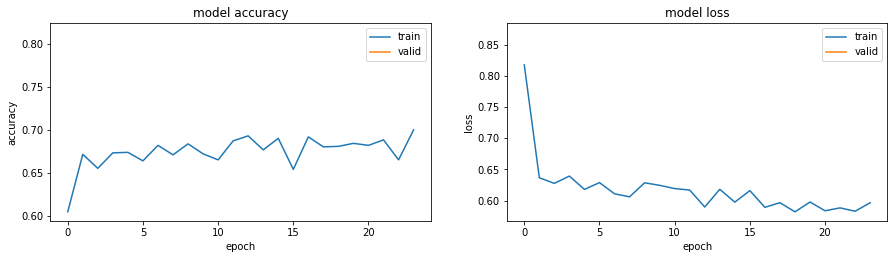

C:\Users\ultim\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
NUM_CLASSES = 3

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/potato/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/potato/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Potato.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Potato.h5')

else:
  history = model.fit(
          train_set,
          epochs=24,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()

  model.save("Best_model\Potato.h5")
  model.save_weights("Best_weights\Potato.h5")

In [ ]:
# model.save("Best_model\Potato.h5")

#### Prediction for Potato

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



7/7 [==============================] - 4s 569ms/step - loss: 0.1634 - accuracy: 0.9558
accuracy: 95.58%


In [ ]:
thresh = 0.60
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\potato\train\potato_healthy\potato_healthy150.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ["Potato with eb", "healthy potato", "Potato with lb"]

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))

healthy potato
probability : 0.9350927


### Grape model

#### Model

Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.
Epoch 1/32
51/51 [==============================] - 59s 1s/step - loss: 1.3494 - accuracy: 0.4248 - val_loss: 1.2750 - val_accuracy: 0.7891
Epoch 2/32
51/51 [==============================] - 33s 644ms/step - loss: 1.2908 - accuracy: 0.5042
Epoch 3/32
51/51 [==============================] - 33s 643ms/step - loss: 1.2440 - accuracy: 0.5152
Epoch 4/32
51/51 [==============================] - 33s 650ms/step - loss: 1.2052 - accuracy: 0.5537
Epoch 5/32
51/51 [==============================] - 35s 689ms/step - loss: 1.1757 - accuracy: 0.5583
Epoch 6/32
51/51 [==============================] - 34s 657ms/step - loss: 1.1453 - accuracy: 0.5595
Epoch 7/32
51/51 [==============================] - 35s 677ms/step - loss: 1.1146 - accuracy: 0.5786
Epoch 8/32
51/51 [==============================] - 34s 659ms/step - loss: 1.0996 - accuracy: 0.5647
Epoch 9/32
51/51 [==============================] - 34s 666ms/step - l

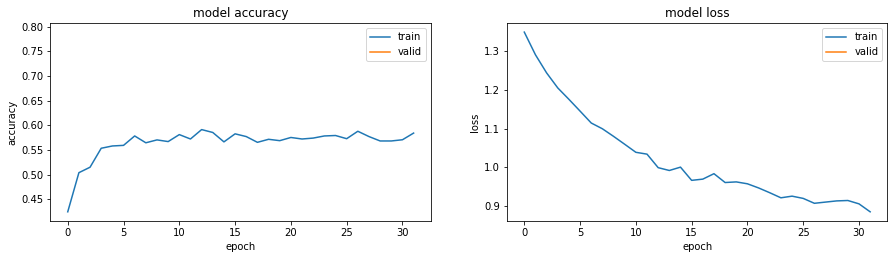

C:\Users\ultim\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
NUM_CLASSES = 4

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/Grape/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/Grape/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Grape.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Grape.h5')

else:
  history = model.fit(
          train_set,
          epochs=32,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()

  model.save("Best_model\Grape.h5")
  model.save_weights("Best_weights\Grape.h5")

In [ ]:
# model.save("Best_model\Grape.h5")

#### Pediction for grapes

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.50
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\Grape\test\grape_esca\grape_esca1000..jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ["black rot", "Blight", "esca", "Healthy"]

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))


13/13 [==============================] - 7s 530ms/step - loss: 0.3069 - accuracy: 0.9716
accuracy: 97.16%
Grape esca
probability : 0.79780877


### Pepper Model

#### Model

In [ ]:
NUM_CLASSES = 2

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/pepper/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/pepper/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Pepper.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Pepper.h5')

else:
  history = model.fit(
          train_set,
          epochs=16,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()
  model.save("Best_model\Pepper.h5")
  model.save_weights("Best_weights\Pepper.h5")

Found 1784 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Model loaded


In [ ]:
# model.save("Best_model\Pepper.h5")

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.50
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\pepper\test\pepper_healthy\pepper_healthy120.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ['Pepper Bacterial Spot','Healthy pepper']

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))

8/8 [==============================] - 6s 603ms/step - loss: 0.3334 - accuracy: 0.9676
accuracy: 96.76%
Healthy pepper
probability : 0.7571882


### Strawberry Model

#### Model

Found 1129 images belonging to 2 classes.
Found 312 images belonging to 2 classes.
Epoch 1/16
18/18 [==============================] - 19s 887ms/step - loss: 0.6685 - accuracy: 0.7068 - val_loss: 0.6399 - val_accuracy: 0.9712
Epoch 2/16
18/18 [==============================] - 12s 649ms/step - loss: 0.6386 - accuracy: 0.8043
Epoch 3/16
18/18 [==============================] - 12s 652ms/step - loss: 0.6149 - accuracy: 0.8202
Epoch 4/16
18/18 [==============================] - 12s 653ms/step - loss: 0.6003 - accuracy: 0.8087
Epoch 5/16
18/18 [==============================] - 12s 658ms/step - loss: 0.5781 - accuracy: 0.8264
Epoch 6/16
18/18 [==============================] - 12s 659ms/step - loss: 0.5692 - accuracy: 0.8096
Epoch 7/16
18/18 [==============================] - 12s 671ms/step - loss: 0.5661 - accuracy: 0.8034
Epoch 8/16
18/18 [==============================] - 12s 673ms/step - loss: 0.5523 - accuracy: 0.8158
Epoch 9/16
18/18 [==============================] - 12s 654ms/step 

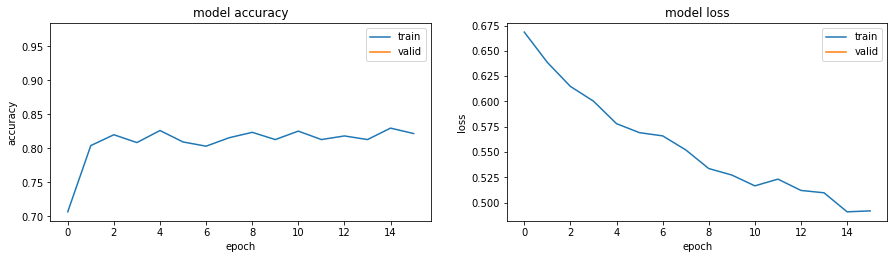

In [ ]:
NUM_CLASSES = 2

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/strawberry/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/strawberry/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Strawberry.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Strawberry.h5')

else:
  history = model.fit(
          train_set,
          epochs=16,
          validation_data=test_set,
          validation_steps=400)
  
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()
  model.save("Best_model\Strawberry.h5")
  model.save_weights("Best_weights\Strawberry.h5")

In [ ]:
# model.save("Best_model\Strawberry.h5")

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.50
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\strawberry\test\strawberry_healthy\strawberry_healthy18.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_straw = ['Starwberry Leaf Scorch', 'Healthy Strawberry']

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_straw[x])
    print(result)
    print("probability : " + str(y))

5/5 [==============================] - 3s 462ms/step - loss: 0.3530 - accuracy: 1.0000
accuracy: 100.00%
Healthy Strawberry
[[0.39826643 0.60173357]]
probability : 0.60173357


### Tomato Model

#### Model

In [ ]:
NUM_CLASSES = 10

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/tomato/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/tomato/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

def lr_scheduler(epoch, lr):
    if epoch > 20:
        lr = 0.001
        return lr
    return lr
# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False
callbacks = [tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

#compiling
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS,
              )

if os.path.exists("Best_weights\Tomato.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Tomato.h5')

else:
  history = model.fit(
          train_set,
          epochs=32,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()
  model.save("Best_model\Tomato.h5")
  model.save_weights("Best_weights\Tomato.h5")

Found 14531 images belonging to 10 classes.
Found 3628 images belonging to 10 classes.
Model loaded


In [ ]:
# model.save("Best_model\Tomato.h5")

In [ ]:
#scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.50
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\tomato\train\tomato_eb\tomato_eb47.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ['Bacterial Spot','Curl Virus','Early Blight','Healthy','Late Blight','Leaf Mold','Mosaic Virus','Septoria Leaf Spot','Spider Mites','Target Spot']


for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))

accuracy: 92.64%
Early Blight
probability : 0.8614616


### Cherry Model

#### Model

In [ ]:
NUM_CLASSES = 2

#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/cherry/train/',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/cherry/test/',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))
# model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Cherry.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Cherry.h5')

else:
  history = model.fit(
          train_set,
          epochs=16,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
  plt.show()
  model.save("Best_model\Cherry.h5")
  model.save_weights("Best_weights\Cherry.h5")

Found 1374 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Model loaded


In [ ]:
# model.save("Best_model\Cherry.h5")

In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

thresh = 0.60
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\cherry\train\cherry_sour_powdery_mildew\cherry_PM52.jpg",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_peach = ['Healthy Cherry','Cherry sour powder mildew']

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_peach[x])
    print("probability : " + str(y))

6/6 [==============================] - 3s 494ms/step - loss: 0.3439 - accuracy: 1.0000
accuracy: 100.00%
Cherry sour powder mildew
probability : 0.632295


## Main Classifier

In [ ]:
NUM_CLASSES = 8

train_datagen = ImageDataGenerator(
      rotation_range = 270,
      brightness_range = (-2,2),
          shear_range=0.2,
          zoom_range=0.3,
      vertical_flip=True,
      validation_split=0.3,
          horizontal_flip=True)
test_datagen = ImageDataGenerator(vertical_flip=True,
                                  horizontal_flip=True,
                                  rotation_range=180,
                                  zoom_range=0.2)
val_datagen = ImageDataGenerator(vertical_flip=True,
                                  horizontal_flip=True,
                                  rotation_range=180,
                                  zoom_range=0.2)
#DATA :
train_set = train_datagen.flow_from_directory(
          'yolo_dataset/Dataset/train',
          target_size=(224,224),
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical')

test_set = test_datagen.flow_from_directory(
          'yolo_dataset/Dataset/test',
          target_size=(224, 224),
          batch_size=64,
          shuffle=True,
          seed=101,
          class_mode='categorical')
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512, activation = DENSE_LAYER_ACTIVATION))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics = LOSS_METRICS)

if os.path.exists("Best_weights\Leaf_classify.h5"):
  print("Model loaded")
  model.load_weights('Best_weights\Leaf_classify.h5')

else:
  history = model.fit(
          train_set,
          epochs=32,
          validation_data=test_set,
          validation_steps=400)
  plt.figure(1, figsize = (15,8)) 
  plt.subplot(221)  
  plt.plot(history.history['accuracy'])  
  plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()


  model.save_weights("Best_weights\Leaf_classify.h5")

Found 28938 images belonging to 8 classes.
Found 7210 images belonging to 8 classes.
Model loaded


In [ ]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

113/113 [==============================] - 98s 855ms/step - loss: 0.0753 - accuracy: 0.9853
accuracy: 98.53%


In [ ]:
thresh = 0.5
test_image = image.load_img(r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\Dataset\test\Grape\grape_105.JPG",target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
class_main = ['Apple','Cherry','Grape','Peach','Pepper','Potato','Strawberry','Tomato']

for x,y in enumerate(result[0]):
  if y > thresh:
    print(class_main[x])
    print("probability : " + str(y))

Grape
probability : 0.99726737


## MAIN PREDECTION CLASS

In [ ]:
# model.save("Best_model\Leaf_classify.h5")

In [ ]:
thresh = 0.5
test_image_path = r"C:\Users\ultim\Documents\Leaf-Disease-Classifier-master\yolo_dataset\strawberry\train\strawberry_Leaf_scorch\strawberry_Leaf_scorch4.jpg"
test_image = image.load_img(test_image_path,target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
model =tf.keras.models.load_model('Best_model\Leaf_classify.h5')
result = model.predict(test_image)
class_main = ['Apple','Cherry','Grape','Peach','Pepper','Potato','Strawberry','Tomato']
class_image = ""
class_index = ""
for x,y in enumerate(result[0]):
  if y > thresh:
    print("Leaf belongs to " + str(class_main[x]))
    #print("probability : " + str(y))
    class_image = class_main[x]
    class_index = x

diseaselist = [['Black Rot','Cedar Apple Rust','Healthy','Apple Scab'],
['Healthy','Powdery Mildew'],
["Black rot", "Blight", "Esca", "Healthy"],
['Bacterial Spot','Healthy'],
['Bacterial Spot','Healthy'],
['Early Blight','Healthy','Late Blight'],
['Leaf Scorch','Healthy'],
['Bacterial Spot','Curl Virus','Early Blight','Healthy','Late Blight',
 'Leaf Mold','Mosaic Virus','Septoria Leaf Spot','Spider Mites','Target Spot']]

path_sub = "Best_model\\" + class_image + ".h5"
model_sub = tf.keras.models.load_model(path_sub)
result_sub = model_sub.predict(test_image)

for x,y in enumerate(result_sub[0]):
  if y > thresh:
    image_sub = diseaselist[class_index][x]
    #print("probability : " + str(y))
    if image_sub == "Healthy":
      print(class_image + " is Healthy.")
    else:
      print(class_image + " has disease : " + image_sub)


Leaf belongs to Strawberry
Strawberry has disease : Leaf Scorch
